In [45]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [94]:
o3 = pd.read_csv("./poj_features_O3.csv", skipinitialspace=True)
o0 = pd.read_csv("./poj_features_O0.csv", skipinitialspace=True)
ollvm = pd.read_csv("./poj_features_ollvm.csv", skipinitialspace=True)

def norm(df):
    for column in df.columns[1:-1]:
        epsilon = 0.000000000000000000000000000000001
        dif = df[column].max() - df[column].min() + epsilon
        df[column] = (df[column] - df[column].min())/dif
    return df

o3 = norm(o3)
o0 = norm(o0)
ollvm = norm(ollvm)

In [95]:
o3Distances = np.zeros(o0.shape[0])
ollvmDistances = np.zeros(o0.shape[0])
i = 0

for _, row in o0.iterrows():
    id = row['id']
    original = row[o3.columns.difference(['id', 'class'])].to_numpy()

    temp = o3[o3['id'] == id][o3.columns.difference(['id', 'class'])]
    if not temp.empty:
        otimized = temp.iloc[0].to_numpy()
        dist = np.linalg.norm(original - otimized)
        o3Distances[i] = dist

    temp = ollvm[ollvm['id'] == id][ollvm.columns.difference(['id', 'class'])]
    if not temp.empty:
        obfuscated = temp.iloc[0].to_numpy()
        dist = np.linalg.norm(original - obfuscated)
        ollvmDistances[i] = dist

    print("The index {} was successfully calculated".format(i), end='\r')
    i += 1

In [96]:
print("Sum of distances between the O3 programs to original programs: {}".format(sum(o3Distances)))
print("Sum of distances between the OLLVM programs to original programs: {}".format(sum(ollvmDistances)))

Sum of distances between the O3 programs to original programs: 8941.103901691085
Sum of distances between the OLLVM programs to original programs: 12099.350484327062


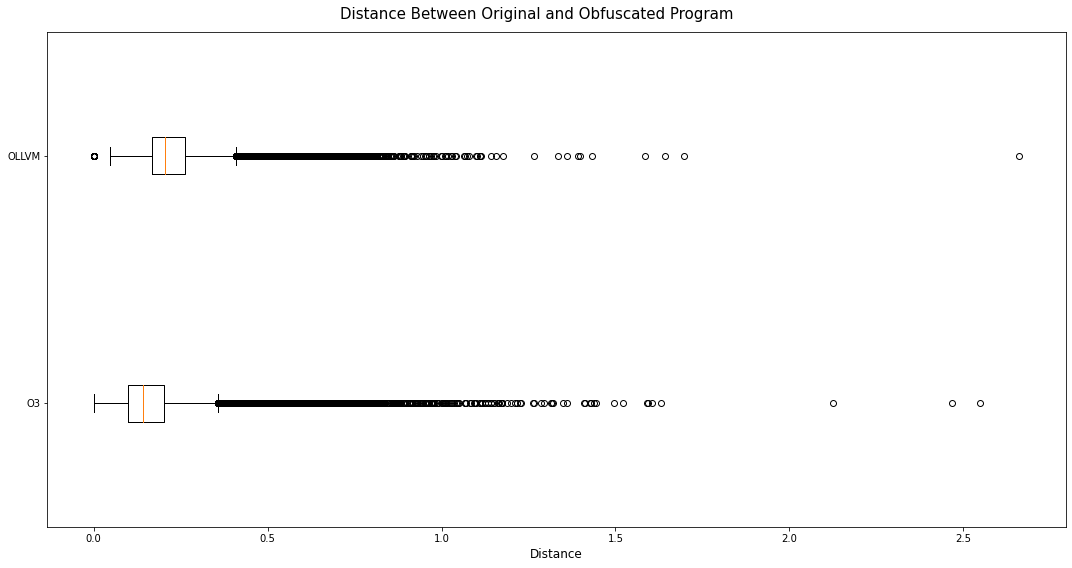

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

fig.suptitle('Distance Between Original and Obfuscated Program', fontsize=15)
ax.boxplot(
    [o3Distances, ollvmDistances], 
    vert=False, 
    showfliers=True,
    labels=('O3', 'OLLVM')
)
ax.set_xlabel("Distance", fontsize=12)

# plt.savefig('distance.pdf')
fig.tight_layout()

Number of outliers of OLLVM: 2538
Number of outliers of O3: 3114


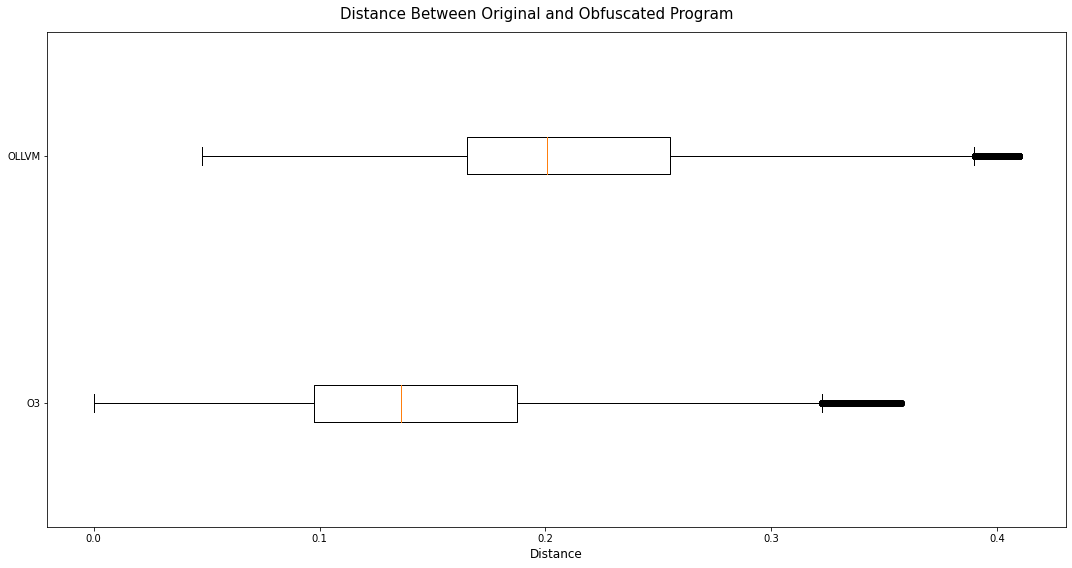

In [164]:
df_O3Distances = pd.Series(o3Distances)
df_ollvmDistances = pd.Series(ollvmDistances)

def countOutliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

out = countOutliers(df_ollvmDistances)
print("Number of outliers of OLLVM: {}".format(out.sum()))
out2 = countOutliers(df_O3Distances)
print("Number of outliers of O3: {}".format(out2.sum()))

fig, ax = plt.subplots(1, 1, figsize=(15,8))

fig.suptitle('Distance Between Original and Obfuscated Program', fontsize=15)
ax.boxplot(
    [df_O3Distances[~out2], df_ollvmDistances[~out]], 
    vert=False, 
    whis=1.5,
    showfliers=True,
    labels=('O3', 'OLLVM')
)
ax.set_xlabel("Distance", fontsize=12)
fig.tight_layout()